In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
cell_counts = pd.read_csv("counts.csv", index_col="id")
absorbance = pd.read_csv("absorbance.csv")

In [8]:
beta = 472
lyc = 456

In [36]:
cell_counts

,A,B,plasmid,temp,media
id,,,,,
1,2.343*2,2.068*2,lyc,30,LB
2,2.259*3,2.576*3,lyc,30,LBF
3,2.892*2,2.707*2,lyc,30,2YT
4,2.356*3,2.322*2,lyc,30,2YTF
5,1.343*2,1.287*2,lyc,37,LB
6,2.989*3,2.793*3,lyc,37,LBF
7,2.699*3,1.672*3,lyc,37,2YT
8,2.032*12,1.622*6,lyc,37,2YTF
9,1.664*2,1.718*2,beta,37,LB


In [14]:
wavelengths = list(absorbance["Wavelength"])

In [19]:
case2well = {
    "A1": "A1",
    "A2": "A2",
    "A3": "A3",
    "A4": "A4",
    "A5": "A5",
    "A6": "A6",
    "A7": "A7",
    "A8": "A8",
    "A9": "A9",
    "A10": "A10",
    "A11": "A11",
    "A12": "A12",
    "A13": "B12",
    "A14": "B11",
    "B1": "C1",
    "B2": "C2",
    "B3": "C3",
    "B4": "C4",
    "B5": "C5",
    "B6": "C6",
    "B7": "C7",
    "B8": "C8",
    "B9": "C9",
    "B10": "C10",
    "B11": "C11",
    "B12": "C12",
    "B13": "D12",
    "B14": "D11",
}

Best lyc: ('B4', 0.0822566752799311)
Best beta: ('B13', 0.11860527732902532)


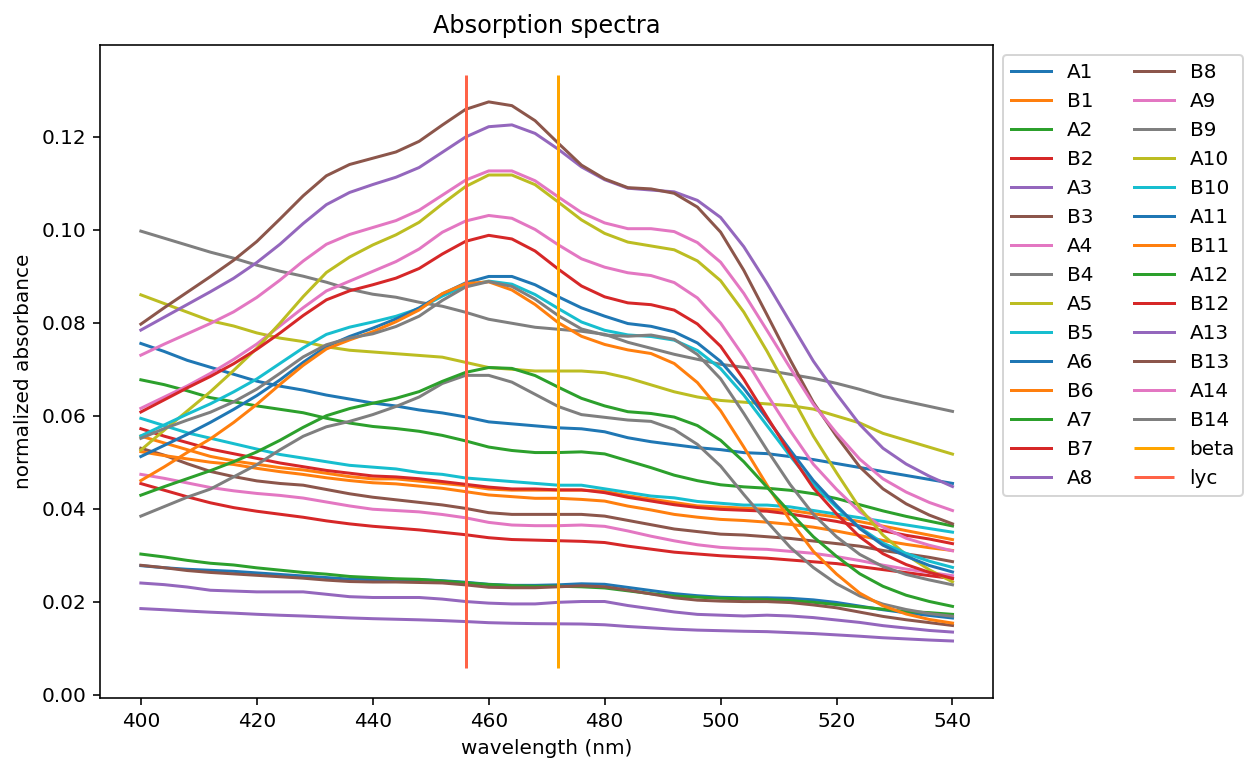

In [49]:
best_beta = None
best_lyc = None

plt.figure(figsize=(8, 6), dpi=144)

for condition in range(1, 15):
    for replicate in "AB":
        case = f"{replicate}{condition}"
        cell_count = eval(cell_counts.loc[condition, replicate])
        
        plasmid = cell_counts.loc[condition, "plasmid"]
        
        absorbs = list(absorbance[case2well[case]] / cell_count)
        wl2abs = {i:j for i, j in zip(wavelengths, absorbs)}
        
        beta_abs = wl2abs[beta]
        lyc_abs = wl2abs[lyc]
        if (plasmid == "beta") and (best_beta is None or beta_abs > best_beta[1]):
            best_beta = (case, beta_abs)
        if (plasmid == "lyc") and (best_lyc is None or lyc_abs > best_lyc[1]):
            best_lyc = (case, lyc_abs)
        
        plt.plot(wavelengths, absorbs, label=case)

axes = plt.gca()
ymin, ymax = axes.get_ylim()
plt.vlines(beta, ymin, ymax, label=f"beta", color="orange")
plt.vlines(lyc, ymin, ymax, label=f"lyc", color="tomato")
plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.title("Absorption spectra")
plt.xlabel("wavelength (nm)")
plt.ylabel("normalized absorbance")


print("Best lyc:", best_lyc)
print("Best beta:", best_beta)